## Student Performance Indicator

# Life cycle of Machine learning Project
1. Understanding the Problem Statement
2. Data Collection
3. Data Checks to perform
4. Exploratory data analysis
5. Data Pre-Processing
6. Model Training
7. Choose best model

1) Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.
2) Data Collection
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
The data consists of 8 column and 1000 rows.

2.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

Import csv file

In [85]:
data=pd.read_csv("data/stud.csv")

In [4]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Shape of the dataset

In [5]:
data.shape

(1000, 8)

## 2.2 Dataset information
-> gender : sex of students -> (Male/female)

-> race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)

-> parental level of education : parents' final education

->(bachelor's degree,some college,master's degree,associate's degree,high school)

-> lunch : having lunch before test (standard or free/reduced)

-> test preparation course : complete or not complete before test

-> math score

-> reading score

-> writing score

## 3. Data Checks to perform
-> Check Missing values

-> Check Duplicates

-> Check data type

-> Check the number of unique values of each column

-> Check statistics of data set

-> Check various categories present in the 
different categorical column

3.1 Check Missing values

In [6]:
data.isnull().sum() #there r no missing values

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

3.2 Check Duplicates

In [7]:
data.duplicated().sum() #no cduplicates

0

3.3 Check data types

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


3.4 Checking the number of unique values of each column


In [11]:
data.nunique() #num of unique values in each column in whole dataset

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [12]:
data.reading_score.unique() # unique values in a column

array([ 72,  90,  95,  57,  78,  83,  43,  64,  60,  54,  52,  81,  53,
        75,  89,  32,  42,  58,  69,  73,  71,  74,  70,  65,  87,  56,
        61,  84,  55,  44,  41,  85,  59,  17,  39,  80,  37,  63,  51,
        49,  26,  68,  45,  47,  86,  34,  79,  66,  67,  91, 100,  76,
        77,  82,  92,  93,  62,  88,  50,  28,  48,  46,  23,  38,  94,
        97,  99,  31,  96,  24,  29,  40], dtype=int64)

3.5 Check statistics of data set

In [13]:
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000



<b>Insight</b>
1. From above description of numerical data, all means are very close to each other - between 66 and 68.05;
2. All standard deviations are also close - between 14.6 and 15.19;
3. While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

3.7 Exploring Data

In [15]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [29]:
for i in range(0,len(data.columns)):
    if (data[data.columns[i]].dtype=='object'):
        print(f"Categories in {data.columns[i]} variable: {data[data.columns[i]].unique()}")


Categories in gender variable: ['female' 'male']
Categories in race_ethnicity variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable: ['standard' 'free/reduced']
Categories in test_preparation_course variable: ['none' 'completed']


In [32]:
# define numerical and categorical columns
numeric_features=[feature for feature in data.columns if data[feature].dtype!='object']
categorical_features=[features for features in data.columns if data[features].dtype=='object']
print(f"we have {len(numeric_features)} numerical features : {numeric_features} \nand {len(categorical_features)} categorical features : {categorical_features}")

we have 3 numerical features : ['math_score', 'reading_score', 'writing_score'] 
and 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


3.8 Adding columns for "Total Score" and "Average"

In [87]:
data['tot_score']=data.math_score+data.reading_score+data.writing_score
data['average']=data.tot_score/3

In [88]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,tot_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [36]:
reading_full=data[data.reading_score==100]['average'].count()
writing_full=data[data.writing_score==100]['average'].count()
math_full=data[data.math_score==100]['average'].count()

print("number of students with full marks in math: ",math_full)
print("number of students with full marks in reading: ",reading_full)
print("number of students with full marks in writing: ",writing_full)

number of students with full marks in math:  7
number of students with full marks in reading:  17
number of students with full marks in writing:  14


In [37]:
reading_less_20=data[data.reading_score<=20]['average'].count()
writing_less_20=data[data.writing_score<=20]['average'].count()
math_less_20=data[data.math_score<=20]['average'].count()

print("number of students with marks less than 20 in math: ",math_less_20)
print("number of students with marks less than 20 in reading: ",reading_less_20)
print("number of students with marks less than 20 in writing: ",writing_less_20)

number of students with marks less than 20 in math:  4
number of students with marks less than 20 in reading:  1
number of students with marks less than 20 in writing:  3


<b>Insights</b>

1. From above values we get students have performed the worst in Maths
2. Best performance is in reading section
## 4. Exploring Data ( Visualization )
4.1 Visualize average score distribution to make some conclusion.
1. Histogram
2. Kernel Distribution Function (KDE)

4.1.1 Histogram & KDE

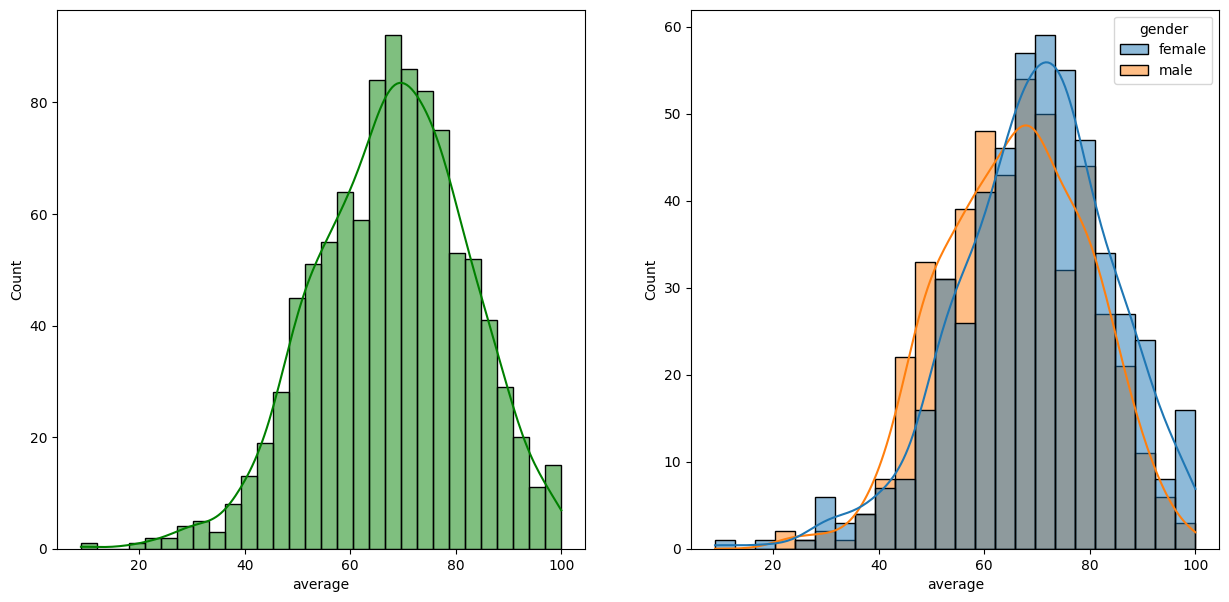

In [46]:
fig, axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=data,x="average",bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=data,x="average",hue='gender',kde=True)
plt.show()

<Axes: xlabel='tot_score', ylabel='Count'>

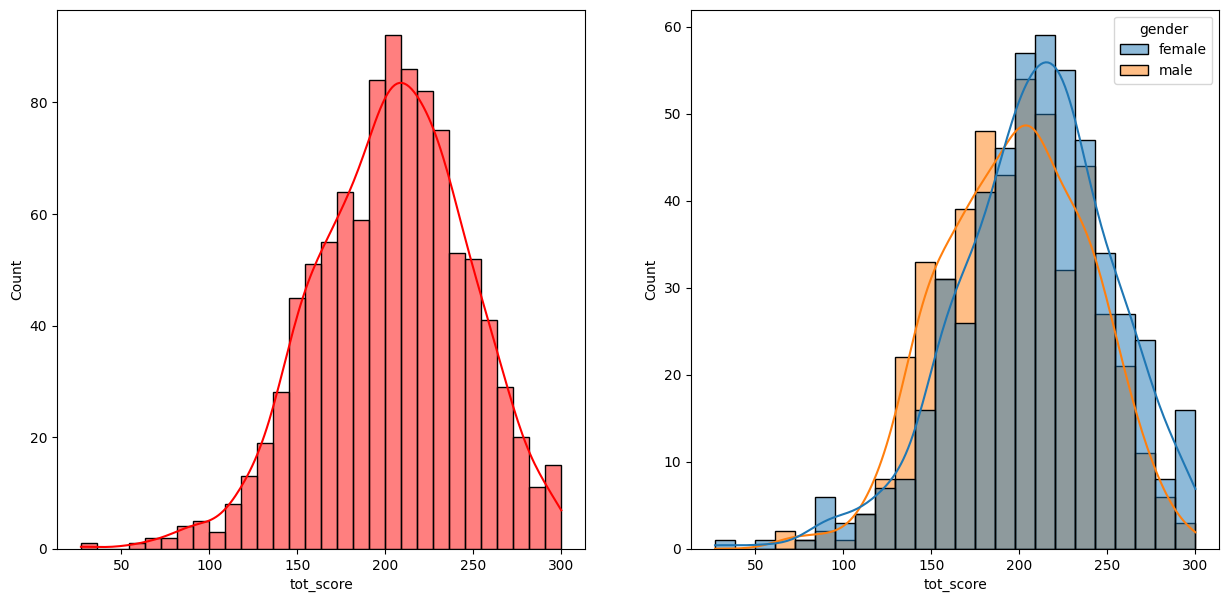

In [51]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=data,x="tot_score",kde=True,color='r',bins=30)
plt.subplot(122)
sns.histplot(data=data,x="tot_score",kde=True,hue='gender')

<b>Insights</b>

Female students tend to perform well then male students.

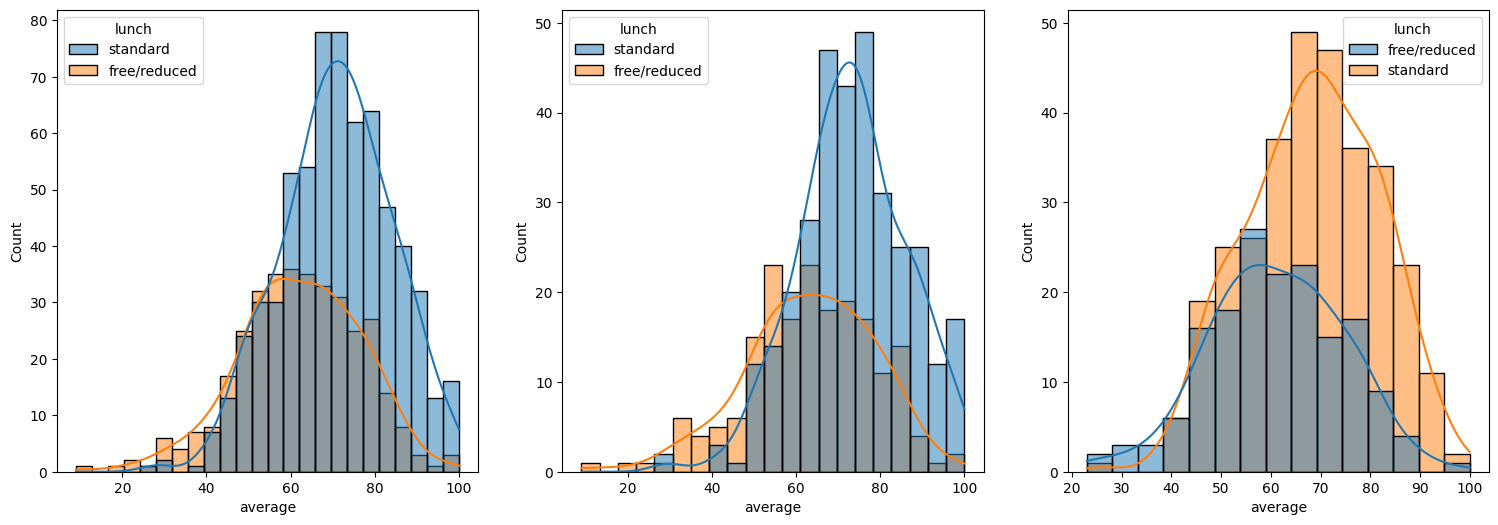

In [47]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=data,x='average',kde=True,hue="lunch")
plt.subplot(142)
sns.histplot(data=data[data.gender=='female'],x='average',hue='lunch',kde=True)
plt.subplot(143)
sns.histplot(data=data[data.gender=='male'],kde=True,hue='lunch',x="average")
plt.show()

<b>Insights</b>
1. Standard lunch helps perform well in exams.
2. Standard lunch helps perform well in exams be it a male or a female.

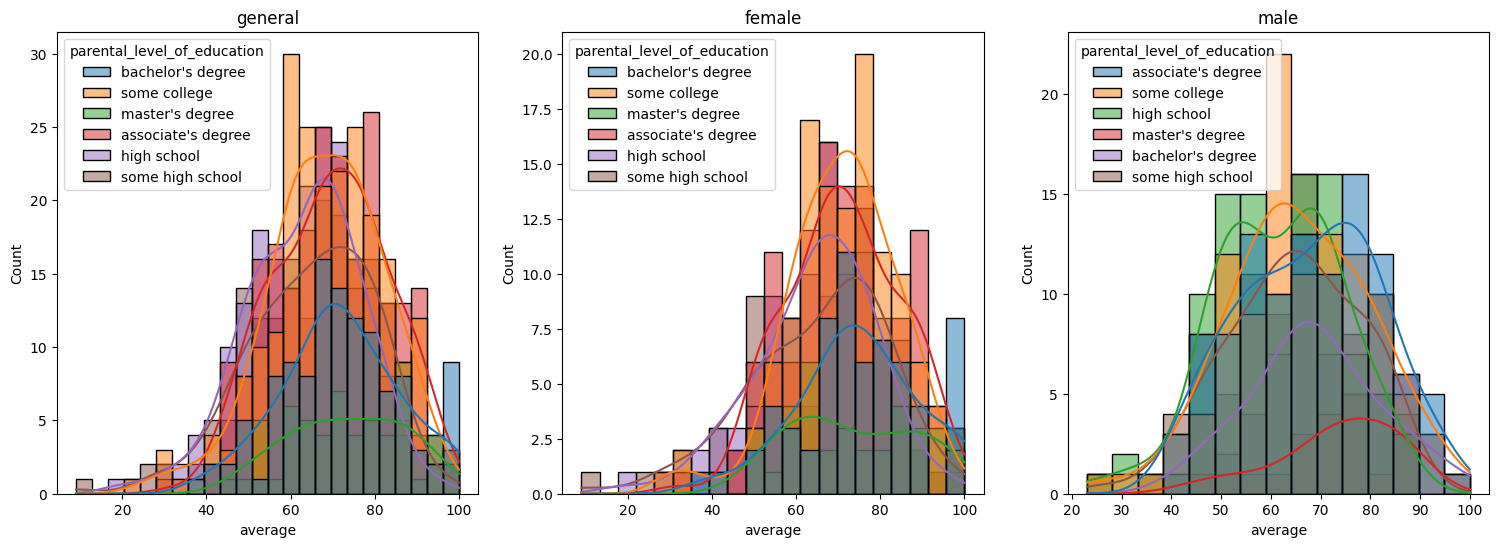

In [57]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax=sns.histplot(data=data,x="average",kde=True,hue='parental_level_of_education')
plt.title("general")
plt.subplot(142)
ax=sns.histplot(data=data[data.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.title("female")
plt.subplot(143)
ax=sns.histplot(data=data[data.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.title("male")
plt.show()


<b>Insights</b>
1. In general parent's education don't help student perform well in exam.
2. 3rd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
3. 2nd plot we can see there is no effect of parent's education on female students.


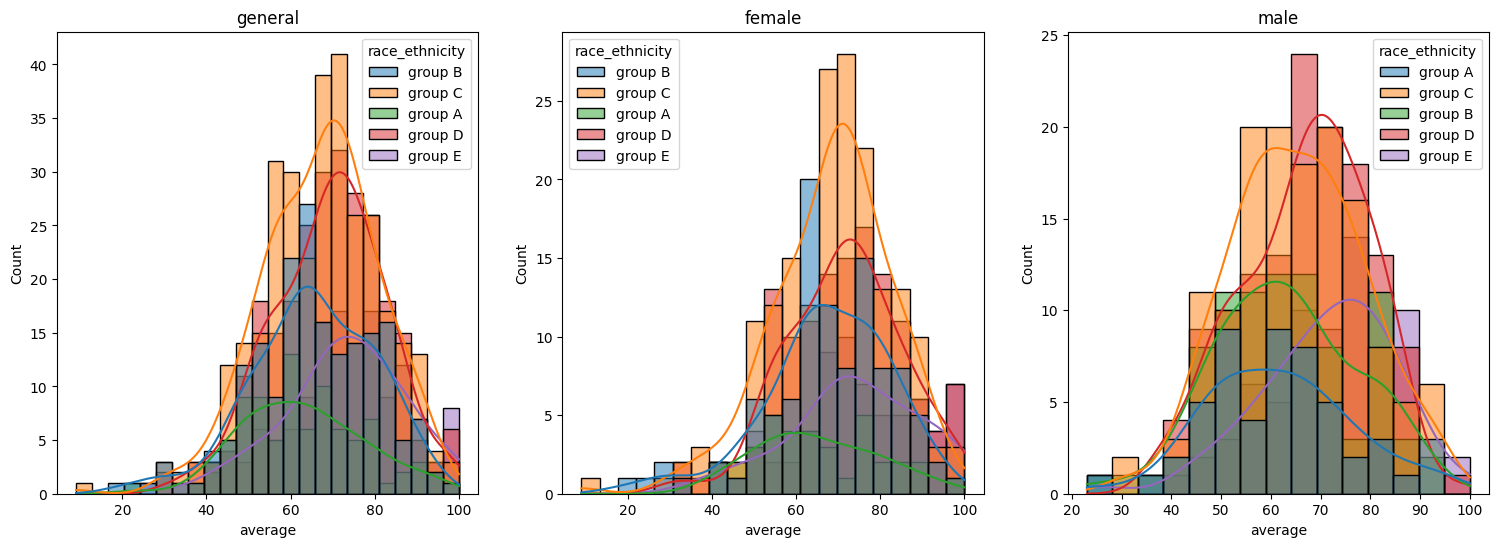

In [58]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax=sns.histplot(data=data,x="average",kde=True,hue='race_ethnicity')
plt.title("general")
plt.subplot(142)
ax=sns.histplot(data=data[data.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.title("female")
plt.subplot(143)
ax=sns.histplot(data=data[data.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.title("male")
plt.show()

<b>Insights</b>
<ul><li>Students of group A and group B tends to perform poorly in exam.</li>
<li>Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female</li></ul>


4.2 Maximumum score of students in all three subjects

<Axes: title={'center': 'WRITING SCORE'}, ylabel='writing_score'>

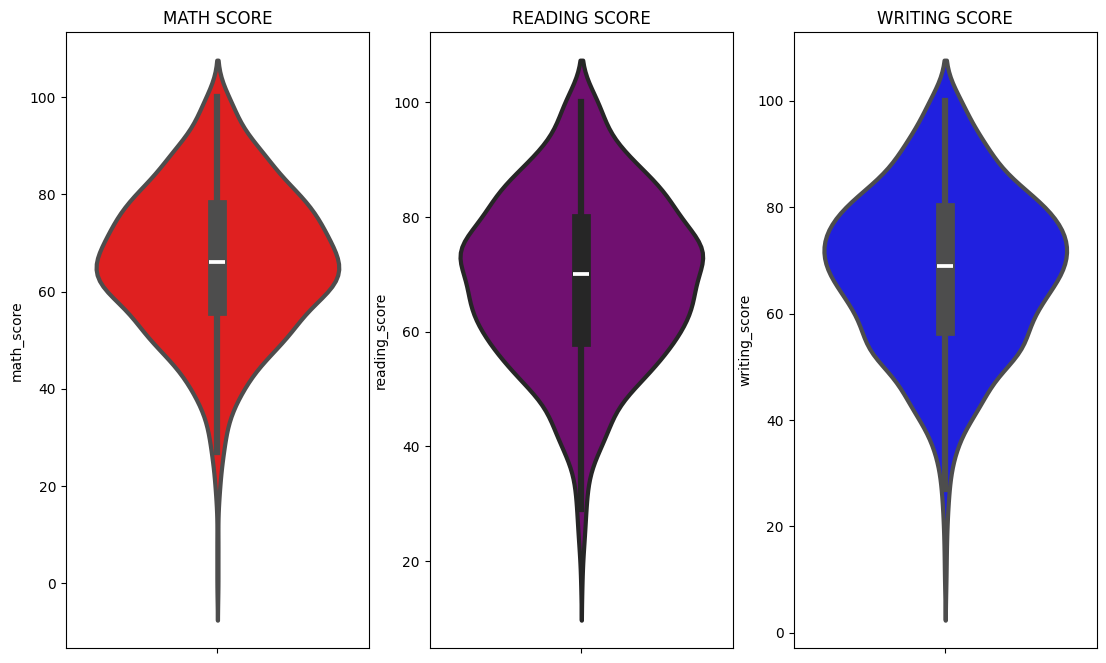

In [60]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('MATH SCORE')
sns.violinplot(y="math_score",data=data,color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title('READING SCORE')
sns.violinplot(data=data,y="reading_score",color='purple',linewidth=3)
plt.subplot(1,4,3)
plt.title('WRITING SCORE')
sns.violinplot(data=data,color='blue',y='writing_score',linewidth=3)

<b>Insights</b>
<ol><li>From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80</li></ol>

4.3 Multivariate analysis using pieplot

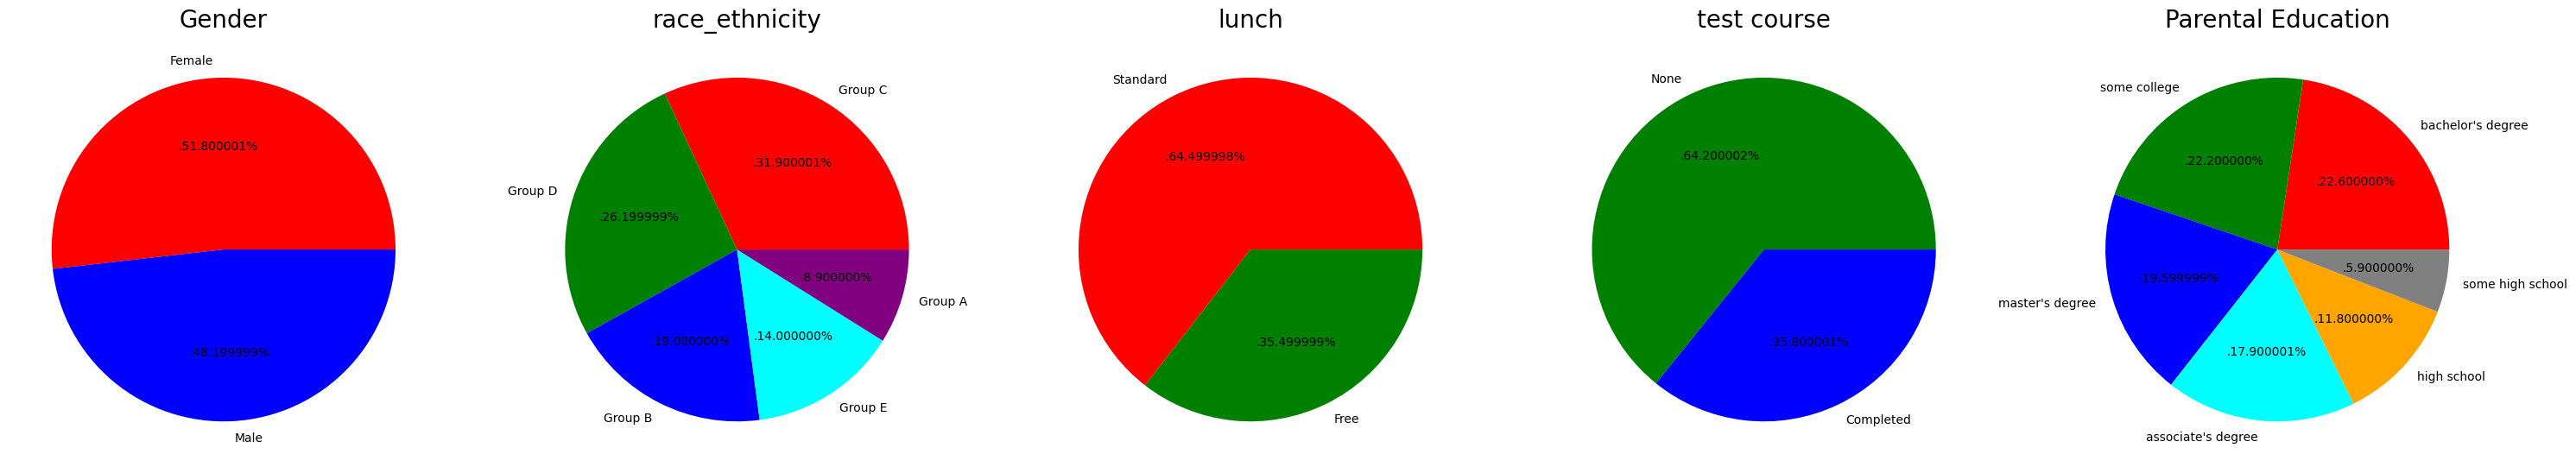

In [66]:
plt.rcParams['figure.figsize']=(30,12)

plt.subplot(1,5,1)
size=data.gender.value_counts()
labels='Female','Male'
color=['red','blue']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')


plt.subplot(1,5,2)
size=data.race_ethnicity.value_counts()
labels='Group C','Group D','Group B','Group E','Group A'
color=['red', 'green', 'blue', 'cyan','purple']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('race_ethnicity', fontsize=20)
plt.axis('off')


plt.subplot(1,5,3)
size=data.lunch.value_counts()
color=['red','green']
labels='Standard','Free'

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('lunch', fontsize=20)
plt.axis('off')


plt.subplot(1,5,4)
size=data['test_preparation_course'].value_counts()
color=['green','blue']
labels='None','Completed'

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('test course', fontsize=20)
plt.axis('off')


plt.subplot(1,5,5)
size=data.parental_level_of_education.value_counts()
color=['red', 'green', 'blue', 'cyan','orange','grey']
labels="bachelor's degree", 'some college', "master's degree","associate's degree", 'high school', 'some high school'

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Parental Education',fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.grid()
plt.show()

<b>Insights</b>
<ul><li>Number of Male and Female students is almost equal</li>
<li>Number students are greatest in Group C</li>
<li>Number of students who have standard lunch are greater</li>
<li>Number of students who have not enrolled in any test preparation course is greater</li>
<li>Number of students whose parental education is 'bachelor's degree' is greatest than followed by "Some College" is greater followed closely by "Associate's Degree"</li></ul>

4.4 Feature Wise Visualization

4.4.1 GENDER COLUMN

1. How is distribution of Gender ?
2. Is gender has any impact on student's performance ?

UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

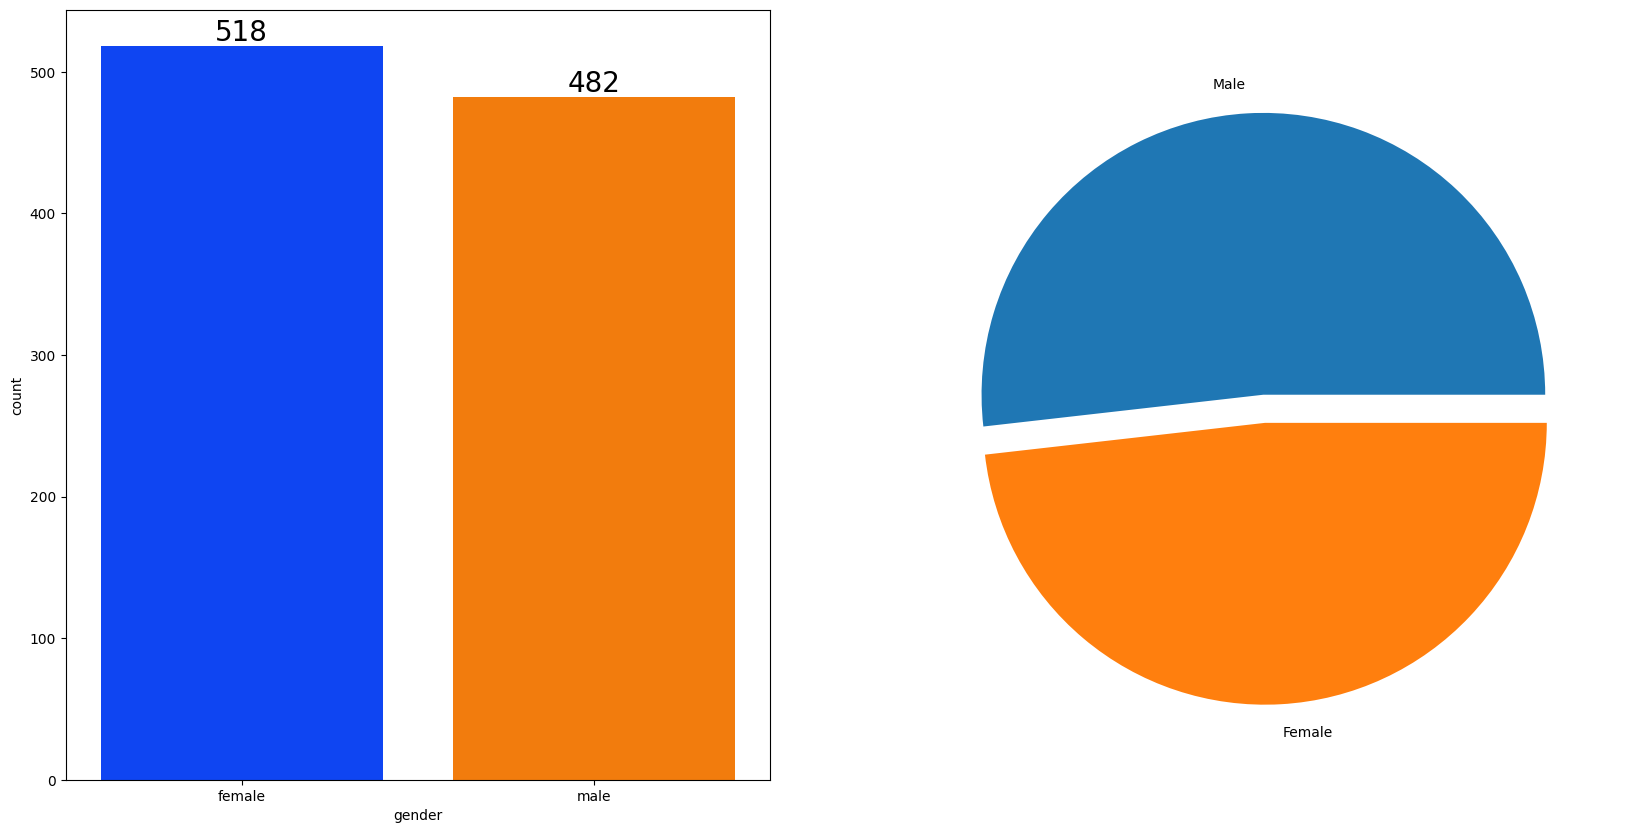

In [67]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=data.gender,data=data,palette='bright',ax=ax[0],saturation=0.9)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=data.gender.value_counts(),labels=['Male','Female'],explode=[0,0.1])
plt.show()

<b>Insights</b>
Gender has balanced data with female students are 518 (52%) and male students are 482 (48%)

BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [91]:
gender_group = data[['average','math_score', 'reading_score',
       'writing_score', 'tot_score','gender']].groupby('gender').mean()
print(gender_group)


          average  math_score  reading_score  writing_score   tot_score
gender                                                                 
female  69.569498   63.633205      72.608108      72.467181  208.708494
male    65.837483   68.728216      65.473029      63.311203  197.512448


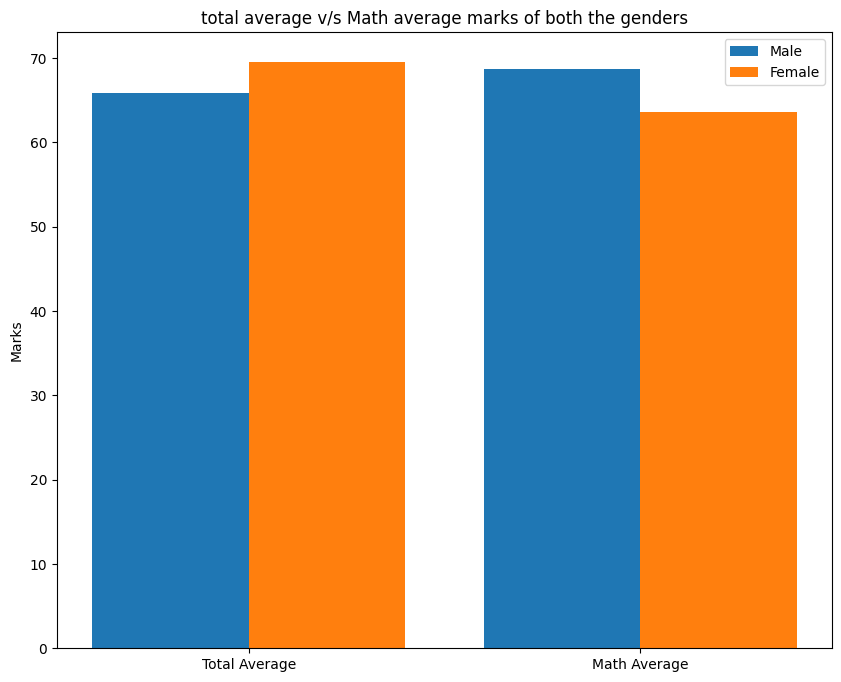

In [93]:
plt.figure(figsize=(10,8))

X=['Total Average','Math Average']

female_scores=[gender_group['average'][0],gender_group['math_score'][0]]
male_scores=[gender_group['average'][1],gender_group['math_score'][1]]

X_axis =np.arange(len(X))

plt.bar(X_axis-.2,male_scores,0.4,label='Male')
plt.bar(X_axis+.2,female_scores,0.4,label='Female')

plt.xticks(X_axis,X)
plt.ylabel("Marks")
plt.title("total average v/s Math average marks of both the genders",fontweight=2)
plt.legend()
plt.show()

<b>Insights</b>
<ul><li>On an average females have a better overall score than men.</li>
<li>whereas males have scored higher in Maths.</li></ul>

4.4.2 RACE/EHNICITY COLUMN

<ul><li>How is Group wise distribution ?</li>
<li>Is Race/Ehnicity has any impact on student's performance ?</li></ul>

UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

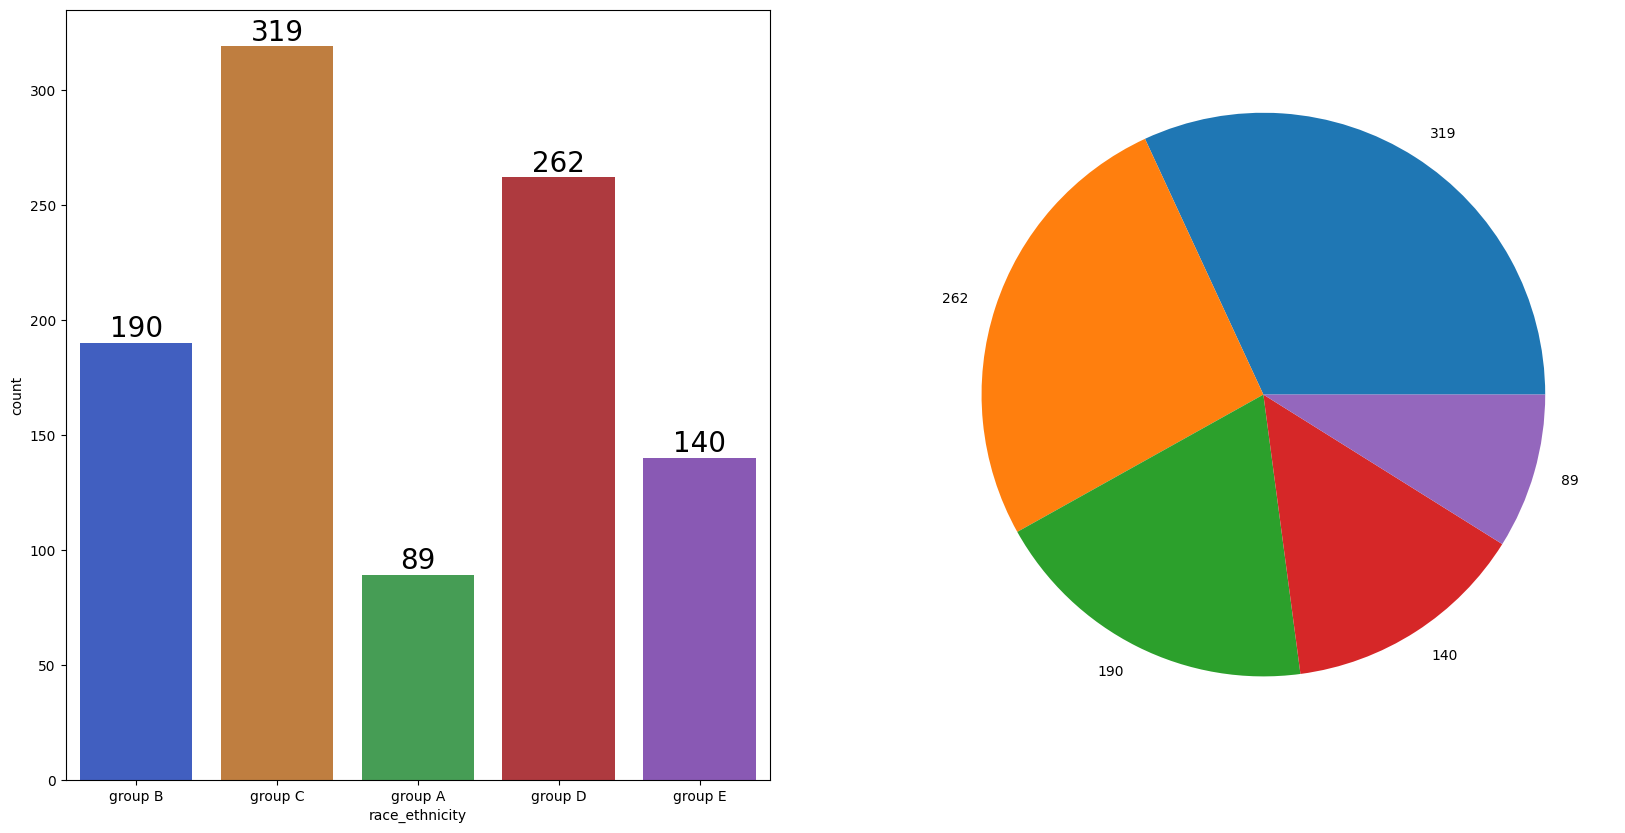

In [95]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=data.race_ethnicity,data=data,palette='bright',ax=ax[0],saturation=0.50)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=data.race_ethnicity.value_counts(),labels=data.race_ethnicity.value_counts())
plt.show()

<b>Insights</b>
<ul><li>Most of the student belonging from group C /group D.</lli>
<li>Lowest number of students belong to groupA.</li> </ul>

BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

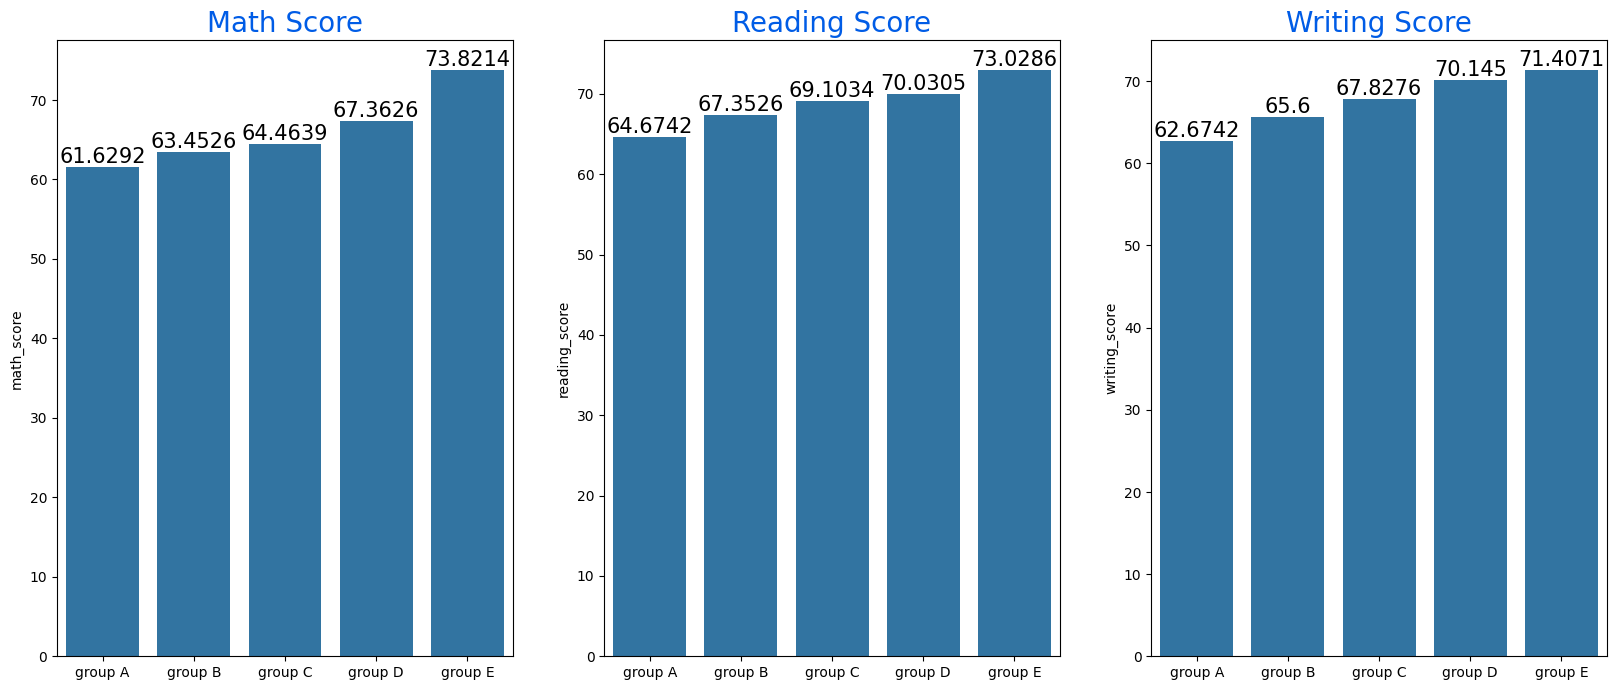

In [99]:
Group_data2=data.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))

plt.subplot(131)
sns.barplot(x=Group_data2['math_score'].mean().index.tolist(),y=Group_data2['math_score'].mean())
ax[0].set_title('Math Score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

plt.subplot(132)
sns.barplot(x=Group_data2['reading_score'].mean().index.tolist(),y=Group_data2.reading_score.mean())
ax[1].set_title('Reading Score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

plt.subplot(133)
sns.barplot(x=Group_data2['writing_score'].mean().index.tolist(),y=Group_data2['writing_score'].mean())
ax[2].set_title('Writing Score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color="black",size=15)

<b>Insights</b>
<ul><li>Group E students have scored the highest marks.</li>
<li>Group A students have scored the lowest marks.</li></ul>

4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN

1. What is educational background of student's parent ?
2. Is parental education has any impact on student's performance ?

UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

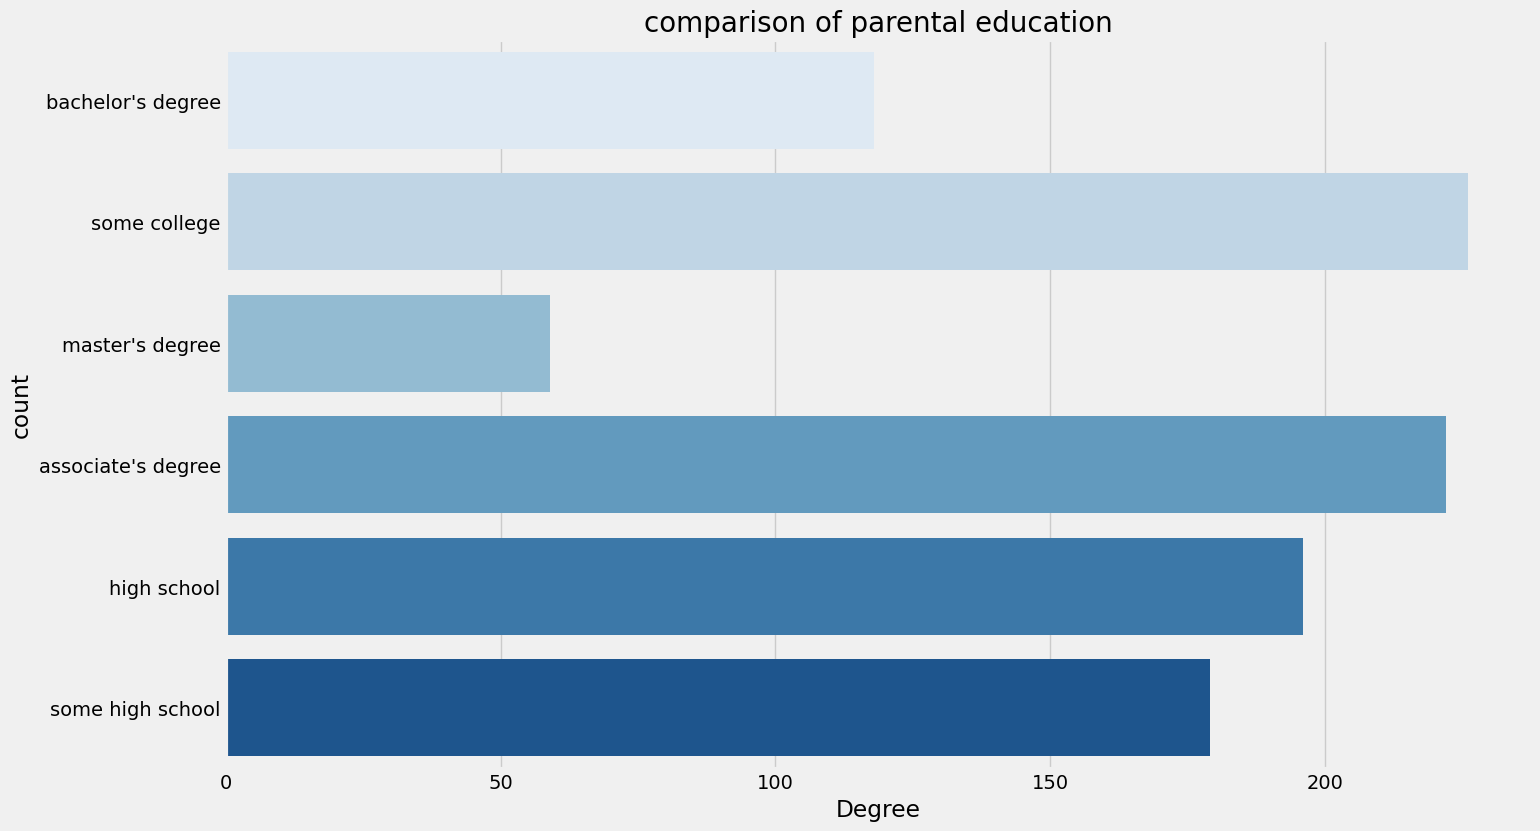

In [100]:
plt.rcParams['figure.figsize']=(15,9)
plt.style.use('fivethirtyeight')
sns.countplot(data.parental_level_of_education,palette='Blues')
plt.title("comparison of parental education",fontweight=30,fontsize=20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

<b>Insights</b>
<ul><li>Largest number of parents are from some college.</li></ul>

BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

<Axes: ylabel='parental_level_of_education'>

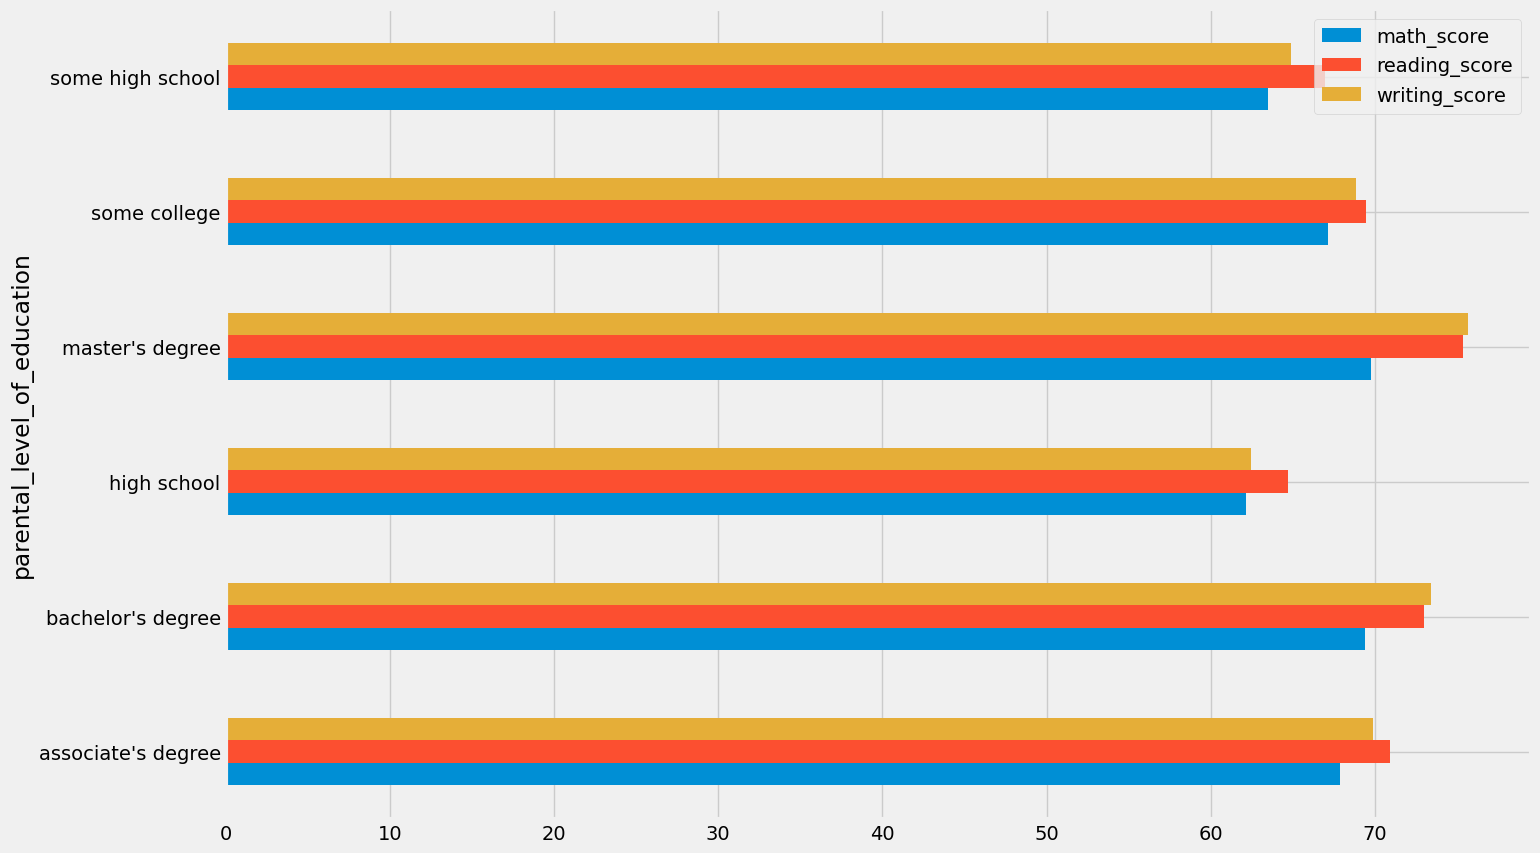

In [108]:
data[numeric_features+['parental_level_of_education']].groupby('parental_level_of_education').agg('mean').plot(kind='barh',figsize=[15,10])
# or data[['average','math_score', 'reading_score','writing_score', 'tot_score','parental_level_of_education']].groupby('parental_level_of_education').agg('mean').plot(kind='barh',figsize=[15,6])


<b>Insights</b>

The score of student whose parents possess master and bachelor level education are higher than others.

<b>4.4.4 LUNCH COLUMN</b>
<ul><li>Which type of lunch is most common amoung students ?</li>
<li>What is the effect of lunch type on test results?</li></ul>

UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

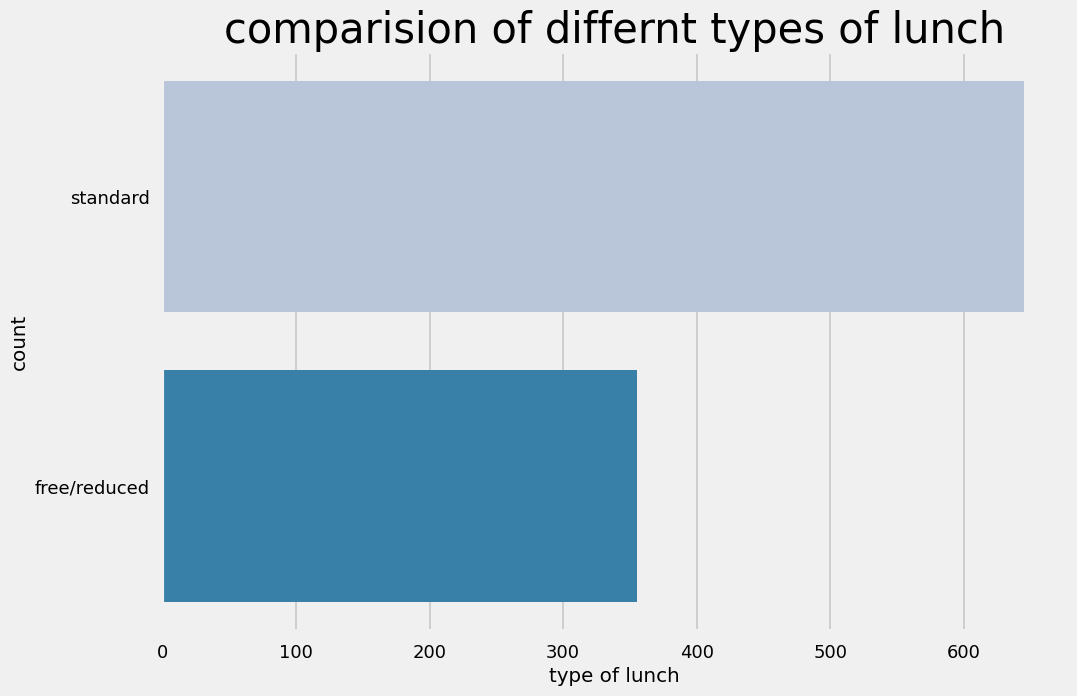

In [113]:
plt.rcParams['figure.figsize']=(10,6)
plt.style.use('seaborn-talk')
sns.countplot(data.lunch,palette='PuBu')
plt.title("comparision of differnt types of lunch",fontweight=30,fontsize=30)
plt.xlabel("type of lunch")
plt.ylabel('count')
plt.show()

<b>Insights</b>

Students being served Standard lunch was more than free lunch

BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

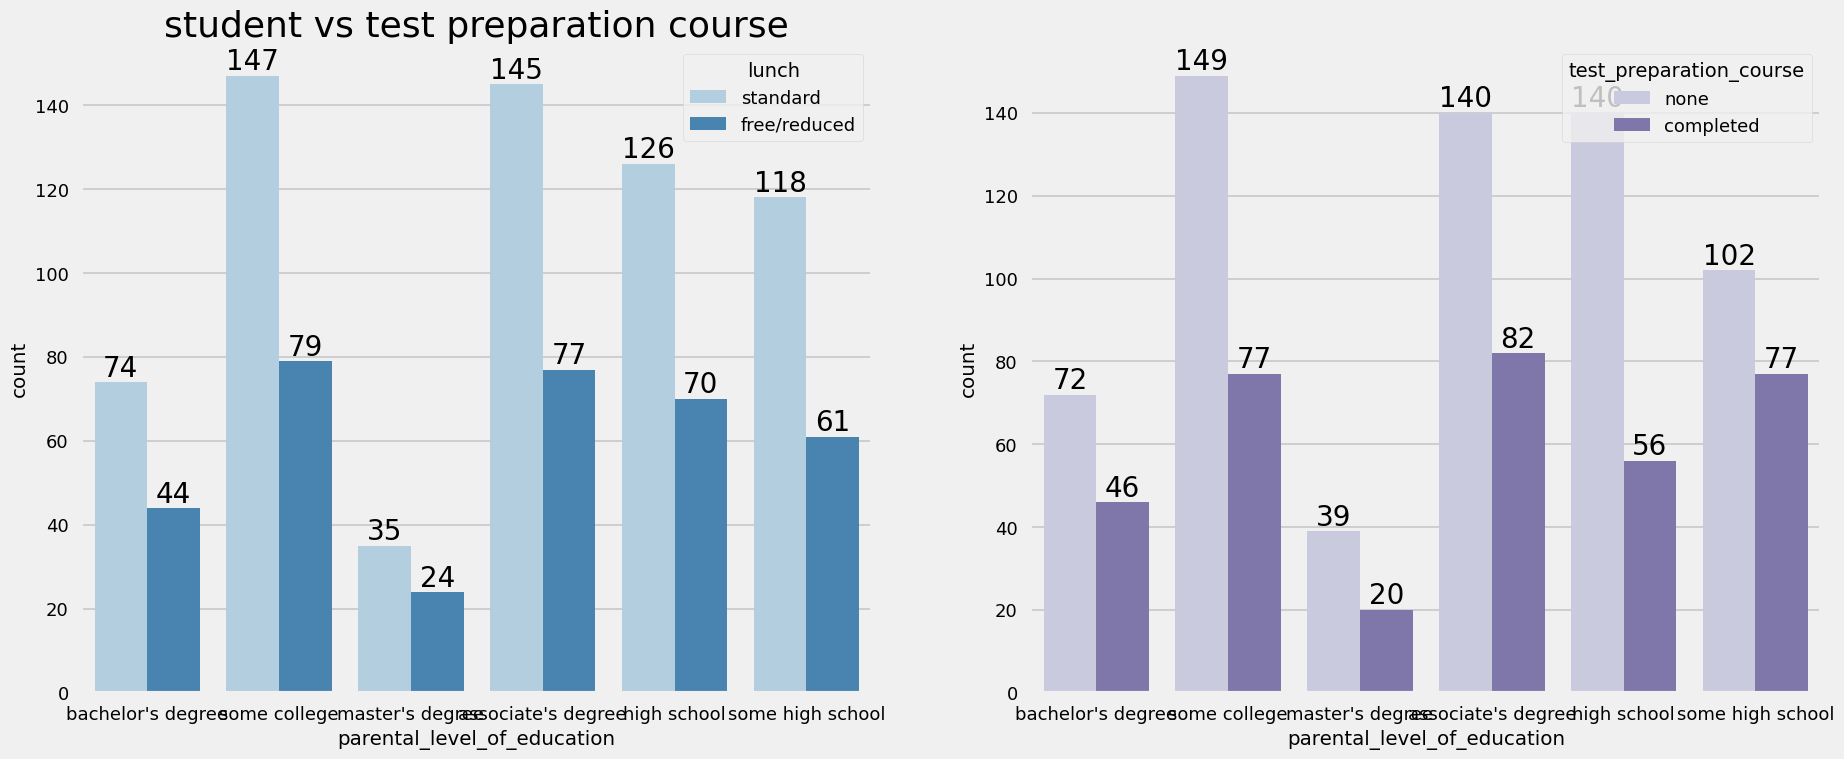

In [130]:
f,ax=plt.subplots(1,2,figsize=(20,8))
plt.subplot(121)
sns.countplot(x=data.parental_level_of_education,data=data,palette='Blues',hue='lunch')
ax[0].set_title('student vs test preparation course',color='black',size=26)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.subplot(122)
sns.countplot(x=data.parental_level_of_education,data=data,palette='Purples',hue='test_preparation_course')
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)

#idk doesnt make sense


Insights

Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

4.4.5 TEST PREPARATION COURSE COLUMN

1. Which type of lunch is most common amoung students ?
2. Is Test prepration course has any impact on student's performance ?

BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

<Axes: xlabel='lunch', ylabel='writing_score'>

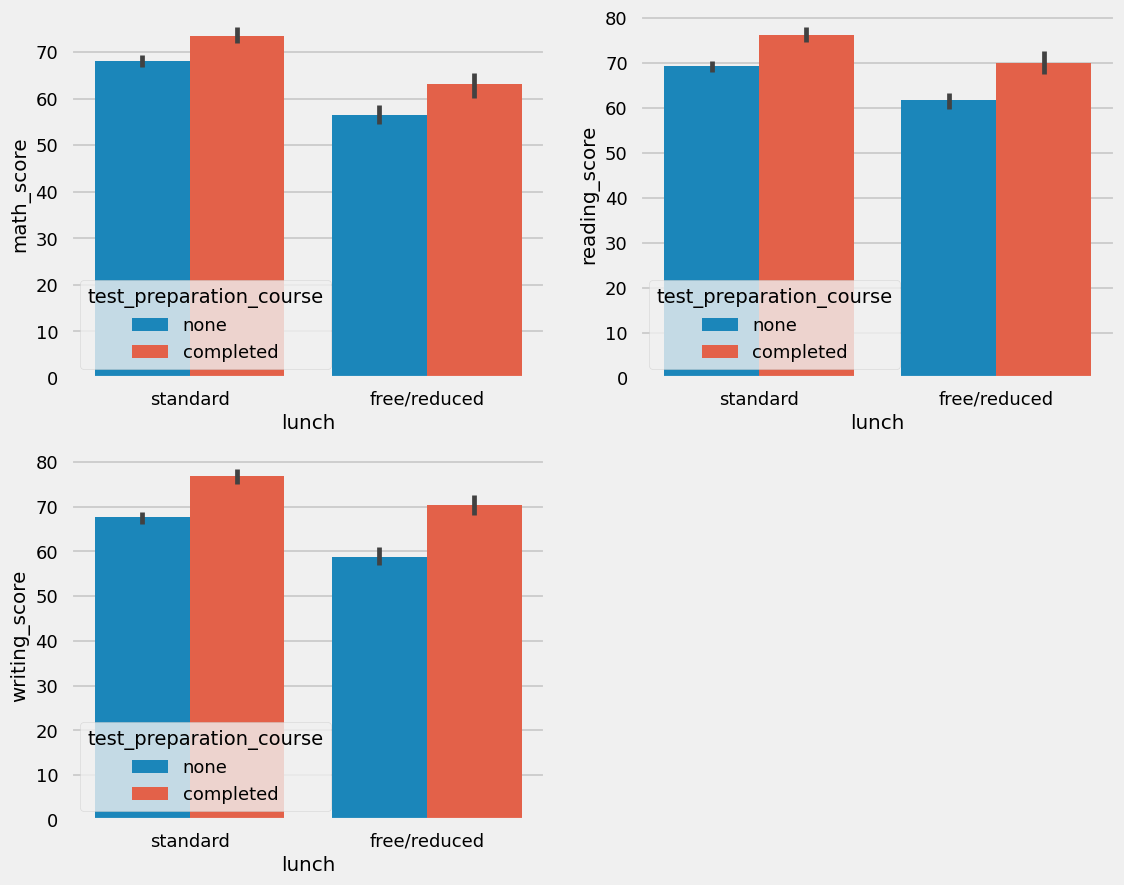

In [134]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.barplot(x=data.lunch,y=data.math_score,hue=data['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot(x=data.lunch,y=data.reading_score,hue=data['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot(x=data.lunch,y=data.writing_score,hue=data['test_preparation_course'])


<b>Insights</b>

Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course in both free and standard luch

4.4.6 CHECKING OUTLIERS

<Axes: ylabel='average'>

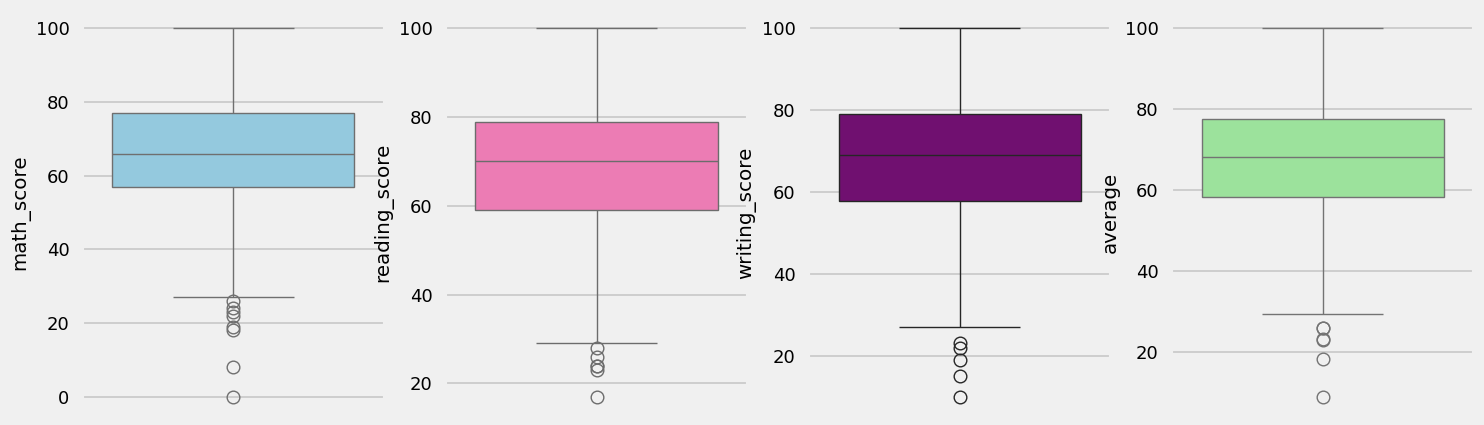

In [136]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(data.math_score,color='skyblue')
plt.subplot(142)
sns.boxplot(data.reading_score,color='hotpink')
plt.subplot(143)
sns.boxplot(data.writing_score,color='purple')
plt.subplot(144)
sns.boxplot(data.average,color='lightgreen')

4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

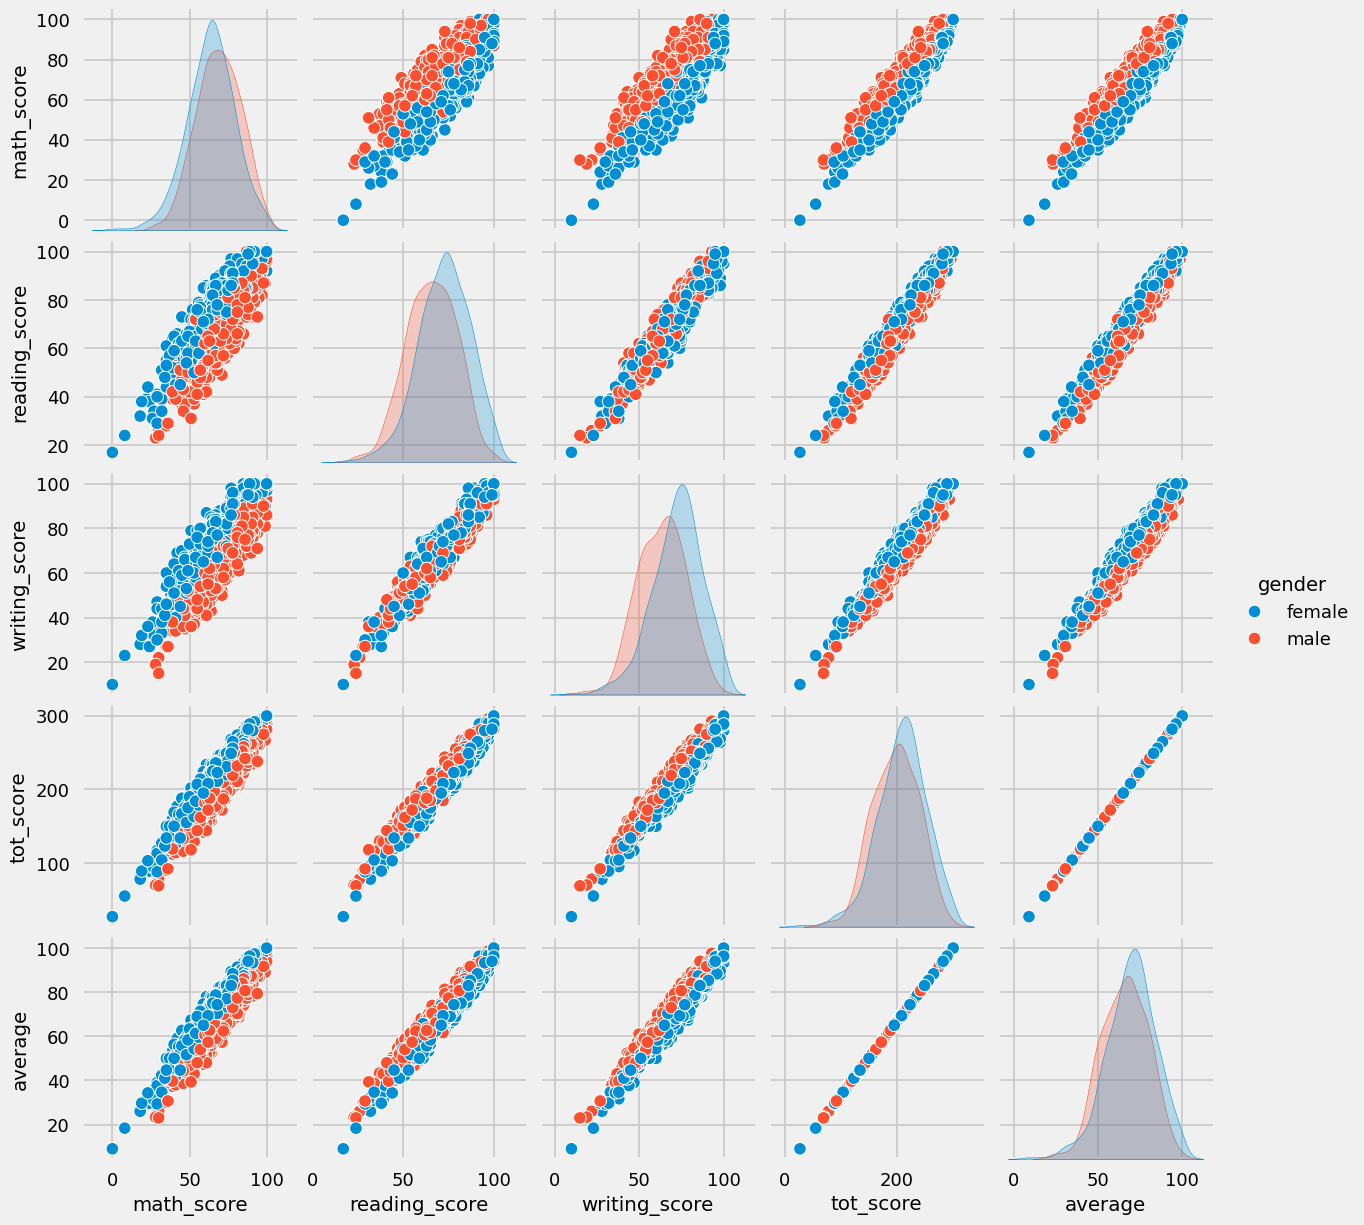

In [137]:
sns.pairplot(data,hue='gender')
plt.show()

<b>Insights</b>

From the above plot it is clear that all the scores increase linearly with each other.

5. Conclusions

<ul><li>Student's Performance is related with lunch, race, parental level education</li>
<li>Females lead in pass percentage and also are top-scorers</li>
<li>Student's Performance is not much related with test preparation course</li>
<li>Finishing preparation course is benefitial.</li></ul>